In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Read Data
Data is got from [sciencedirect.com](https://www.sciencedirect.com/science/article/pii/S2352340922009775)

In [5]:
df = pd.read_csv('Air-Quality-Ho-Chi-Minh-City.csv')
df.date = pd.to_datetime(df.date, dayfirst=True, format='%d-%m-%Y %H:%M')
df.Station_No = df.Station_No.astype('str')
df

,date,Station_No,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
0,2021-02-23 21:00:00,1,32.935714,15.604762,55.431381,1330.451429,112.740762,393.000000,28.361905,63.188095
1,2021-02-23 22:00:00,1,30.932353,14.594118,58.197176,1200.603529,112.366471,377.588235,28.320588,63.773529
2,2021-02-23 23:00:00,1,27.645000,13.436667,55.029433,1177.897000,112.700433,372.476667,28.336667,64.205000
3,2021-02-24 00:00:00,1,24.380000,12.365000,54.767700,1267.476000,112.480867,389.070000,28.305000,64.735000
4,2021-02-24 01:00:00,1,22.521667,11.636667,53.786200,1322.293000,114.331500,393.000000,28.300000,65.188333
...,...,...,...,...,...,...,...,...,...,...
52543,2022-06-21 13:00:00,6,21.526667,10.201667,100.080283,1007.907000,73.962600,146.720000,33.496667,60.470000
52544,2022-06-21 14:00:00,6,26.590000,11.250000,119.612133,1262.319000,96.609333,181.216667,33.026667,62.556667
52545,2022-06-21 15:00:00,6,27.606667,11.355000,119.448550,1457.330000,100.310600,212.220000,33.106667,62.175000
52546,2022-06-21 16:00:00,6,37.433333,15.048333,125.730150,2125.257000,128.383767,350.643333,31.406667,70.605000


In [4]:
df[['Station_No']].groupby(['Station_No']).value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [66]:
# df[df['TSP'] < df['PM2.5']]

Phân tích theo trạm (Optional)

In [67]:
# station = 2 # chọn trạm 1-6
# df = df[df['Station_No'] == str(station)]
# df

# Thống kê mô tả

In [6]:
pd.Series(df.isnull().mean() * 100, name='missing_rate')

date            0.000000
Station_No      0.000000
TSP             0.114181
PM2.5           0.000000
O3             20.191063
CO             17.250894
NO2            10.782523
SO2            20.944660
Temperature     8.443709
Humidity        8.434193
Name: missing_rate, dtype: float64

In [7]:
df.describe()

,TSP,PM2.5,O3,CO,NO2,SO2,Temperature,Humidity
count,52488.000000,52548.000000,41938.000000,43483.000000,46882.000000,41542.000000,48111.000000,48116.000000
mean,43.550369,21.126031,94.229522,993.923726,96.444586,224.611910,27.812098,63.559275
std,35.513882,14.229703,37.535105,615.692946,71.569328,114.412342,4.291604,25.718395
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.620000,18.491667,11.320000
25%,24.638333,12.520000,71.667044,699.432450,54.076133,140.606667,25.858333,56.558333
50%,38.775000,17.475000,90.232567,789.555800,78.855800,193.880000,28.083333,70.615000
75%,57.097115,25.636667,112.669312,1112.575000,113.672800,286.016667,30.680000,82.355000
max,938.198333,403.688333,377.288600,21092.570770,461.090000,699.976667,42.808333,99.283333


In [8]:
df.describe(exclude=[np.number])

C:\Users\84868\AppData\Local\Temp\ipykernel_18456\2684435253.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(exclude=[np.number])


,date,Station_No
count,52548,52548
unique,10452,6
top,2022-02-21 05:00:00,4
freq,6,9951
first,2021-02-23 21:00:00,NaN
last,2022-06-21 17:00:00,NaN


In [9]:
df_max = pd.DataFrame([], columns=['date','Station_No','Max Value', 'Attribute'])
for col in df.columns[2:]:
    t = df.loc[df[col][df[col] == df[col].max()].index[0]][['date','Station_No',col]].values.tolist() + [col]
    df_max.loc[len(df_max.index)] = t
df_max

,date,Station_No,Max Value,Attribute
0,2021-10-14 14:00:00,4,938.198333,TSP
1,2021-10-14 14:00:00,4,403.688333,PM2.5
2,2021-08-10 18:00:00,4,377.288600,O3
3,2021-03-12 10:00:00,6,21092.570770,CO
4,2021-03-16 10:00:00,5,461.090000,NO2
5,2021-05-15 16:00:00,6,699.976667,SO2
6,2022-06-09 12:00:00,5,42.808333,Temperature
7,2021-04-27 07:00:00,4,99.283333,Humidity


In [72]:
df_min = pd.DataFrame([], columns=['date','Station_No','Min Value', 'Attribute'])
for col in df.columns[2:]:
    t = df.loc[df[col][df[col] == df[col].min()].index[0]][['date','Station_No',col]].values.tolist() + [col]
    df_min.loc[len(df_min.index)] = t
df_min

,date,Station_No,Min Value,Attribute
0,2021-10-06 11:00:00,1,0.000000,TSP
1,2021-10-07 19:00:00,1,0.000000,PM2.5
2,2021-10-06 11:00:00,1,0.000000,O3
3,2021-10-06 11:00:00,1,0.000000,CO
4,2021-03-17 10:00:00,1,0.000000,NO2
5,2022-01-12 11:00:00,4,2.620000,SO2
6,2022-06-03 02:00:00,5,18.491667,Temperature
7,2022-06-03 01:00:00,5,11.320000,Humidity


In [73]:
df_numeric = df.drop(['date', 'Station_No'], axis=1)

In [74]:
def plot_hist(plt, df, attribute):
    plt.hist(df[attribute], edgecolor = "black")
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Requency')
    plt.grid(axis='y')
    
    return plt

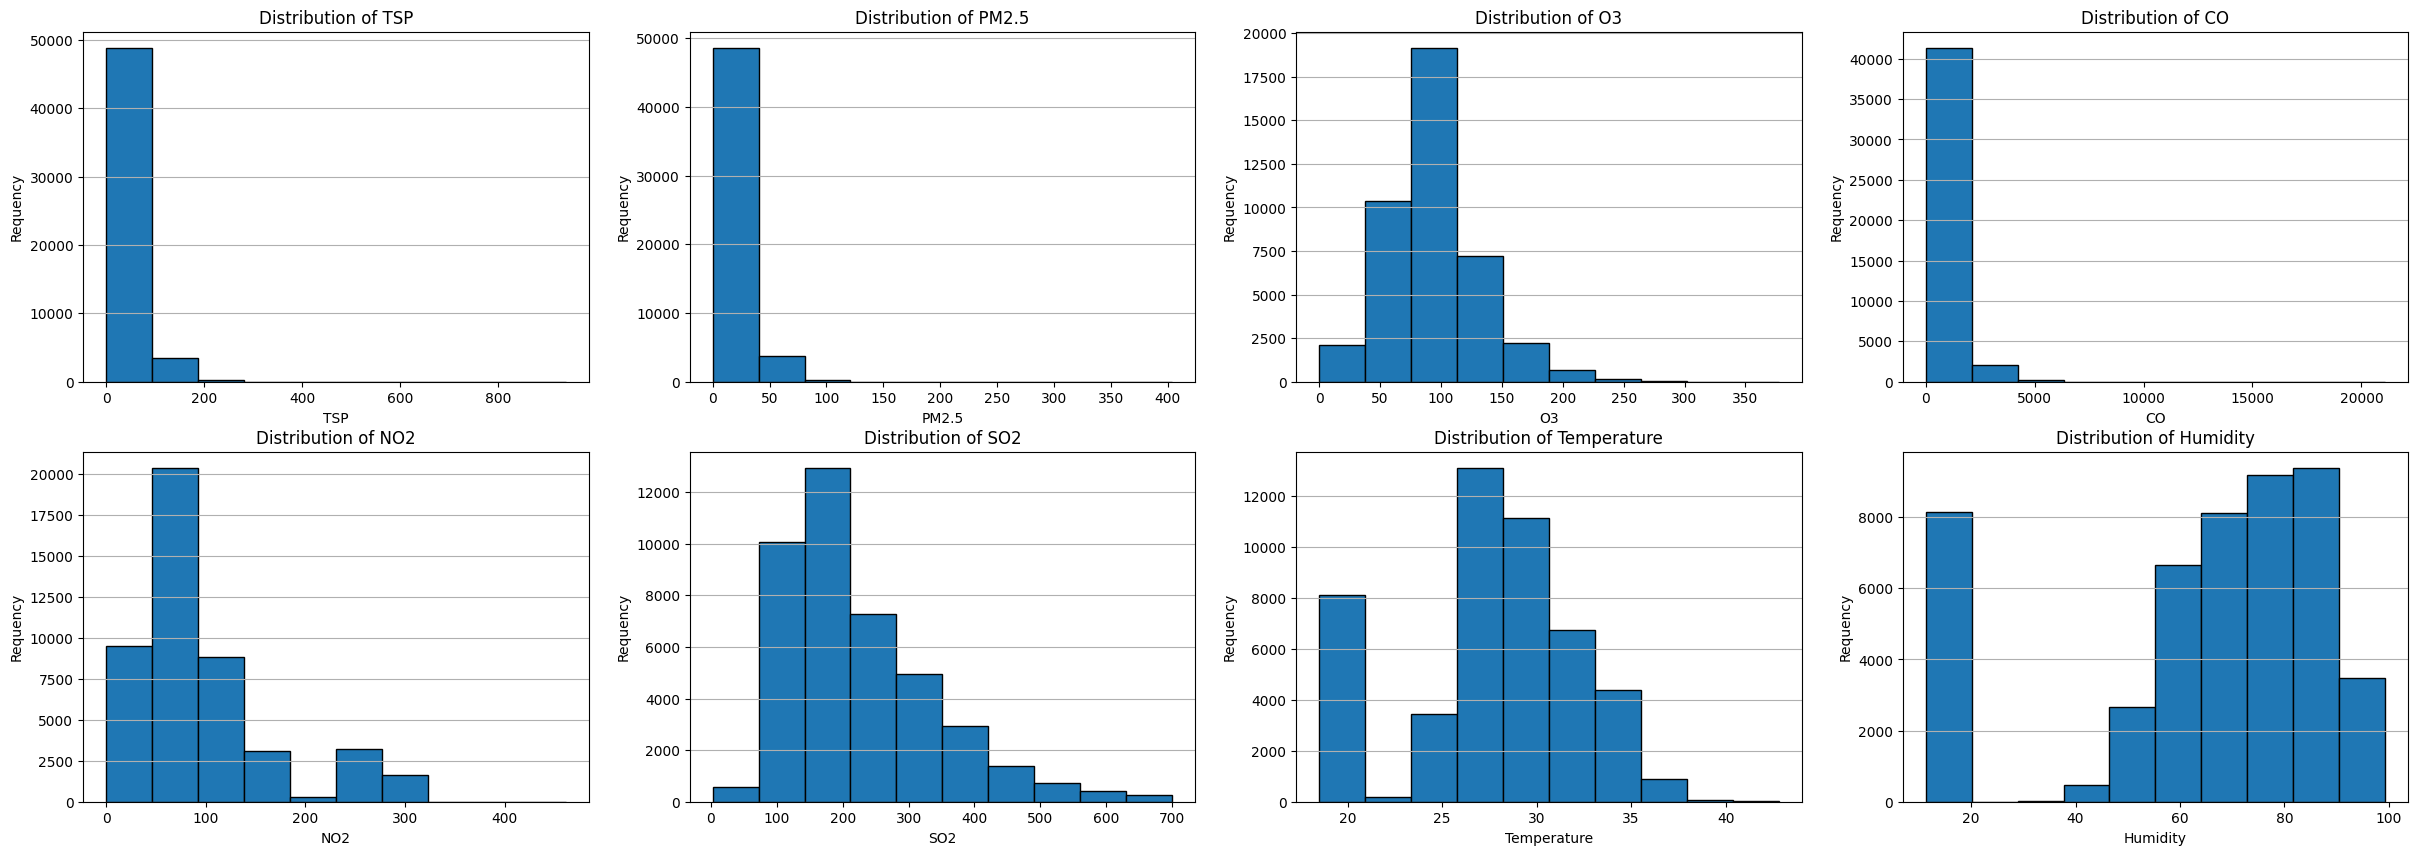

In [75]:
plt.figure(figsize=(30,10))
plt.tight_layout()

for i in range(len(df_numeric.columns)):
    plt.subplot(2,4,i+1)
    plot_hist(plt, df, df_numeric.columns[i])

plt.show()

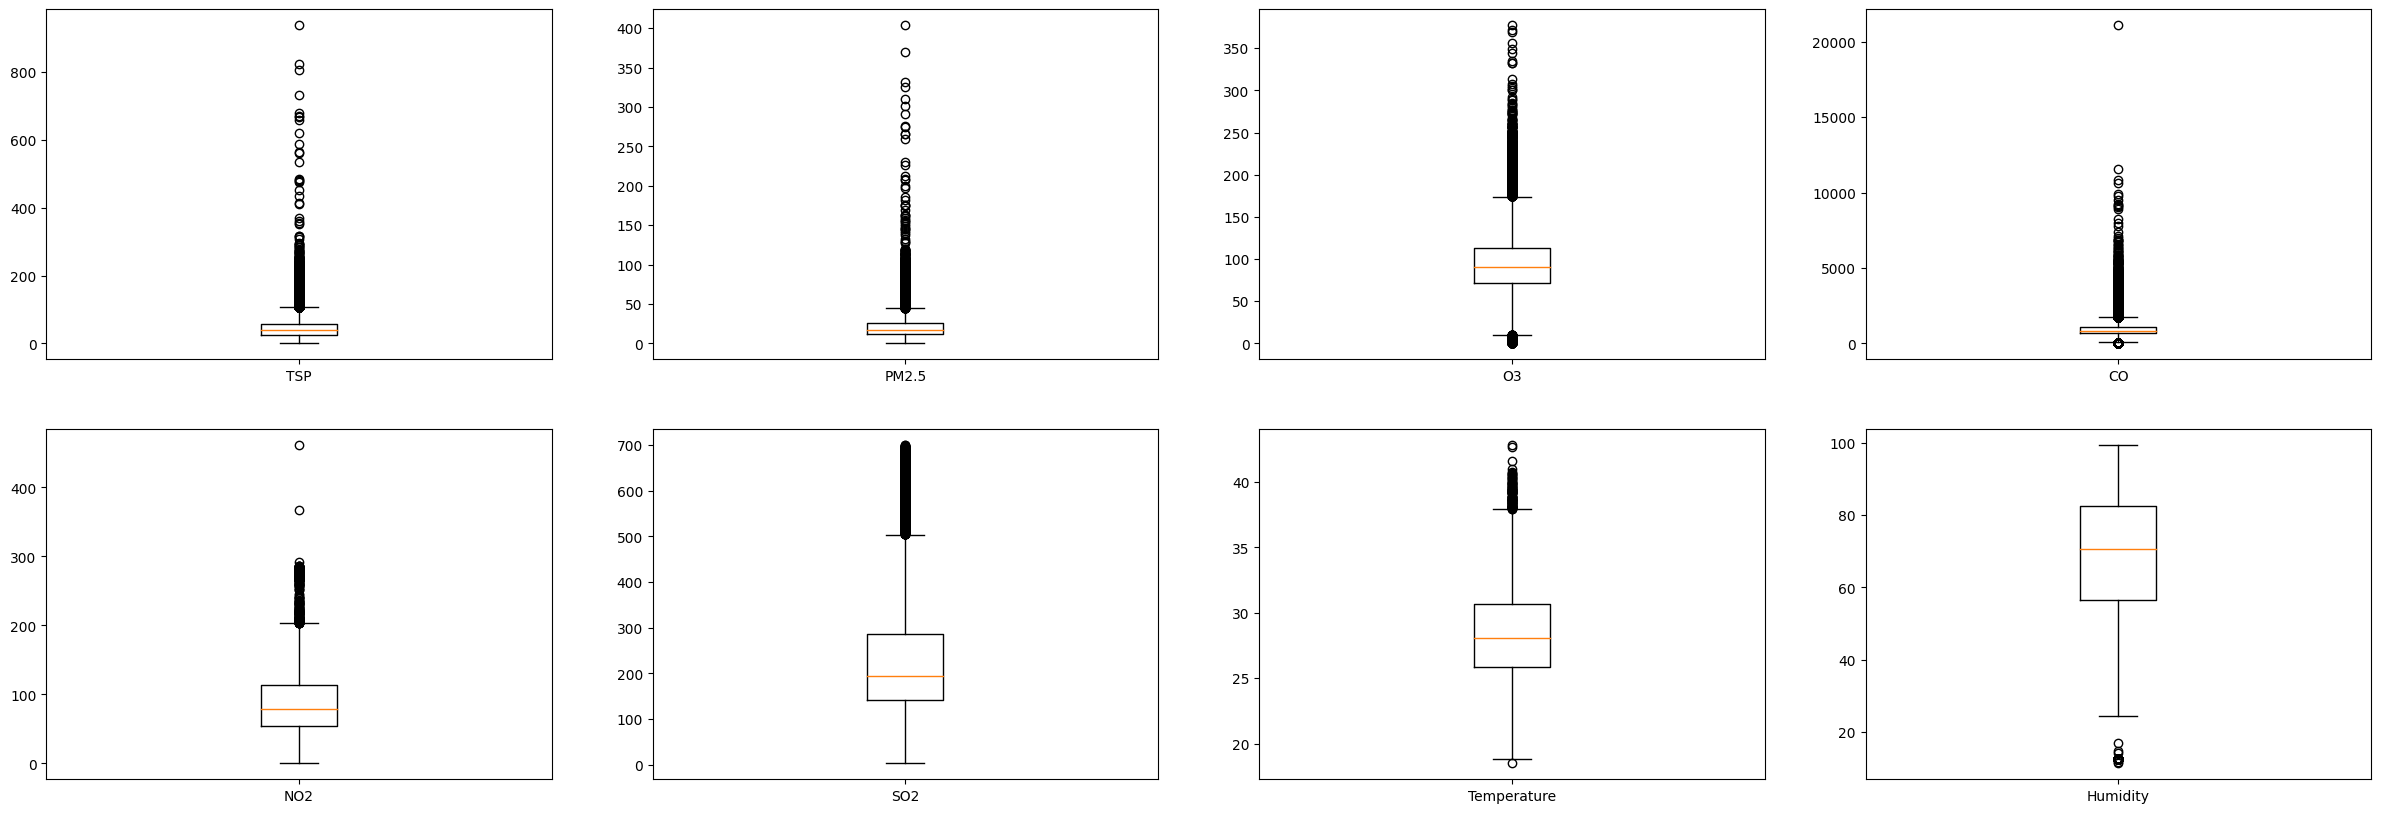

In [76]:
plt.figure(figsize=(30,10))
plt.tight_layout()

for i, col in enumerate(df_numeric.columns):
    plt.subplot(2,4,i+1)
    plt.boxplot(df[col].dropna(), labels=[col])

plt.show()

# Phân tích dữ liệu đơn giản

C:\Users\ACER\AppData\Local\Temp\ipykernel_3332\3173252875.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

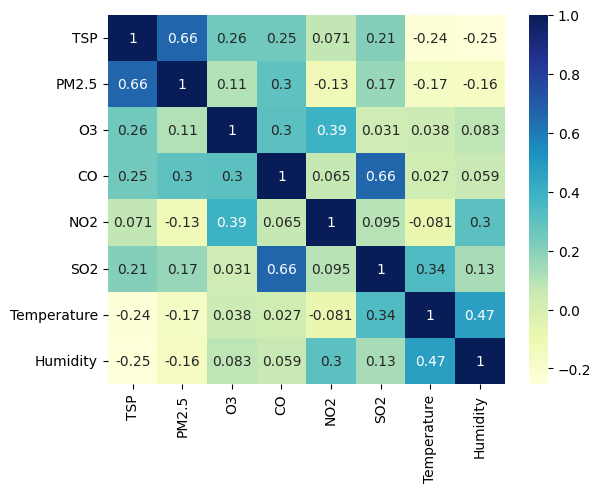

In [77]:
corr = df.corr()
# print(corr)
sb.heatmap(corr, cmap="YlGnBu", annot=True)

In [78]:
def plot_scatter(plt, df, attr_1, attr_2):
    value = df[attr_1].corr(df[attr_2])
    print(f'The correlation coefficient between {attr_1} and {attr_2}: {value}')

    plt.scatter(df[attr_1], df[attr_2] + np.random.random(len(df[attr_2])))
    plt.title(f'Scatter plot of {attr_1} and {attr_2}')
    plt.xlabel(attr_1)
    plt.ylabel(attr_2)
    return plt

The correlation coefficient between TSP and PM2.5: 0.6618454359036333
The correlation coefficient between CO and SO2: 0.6637502531076072


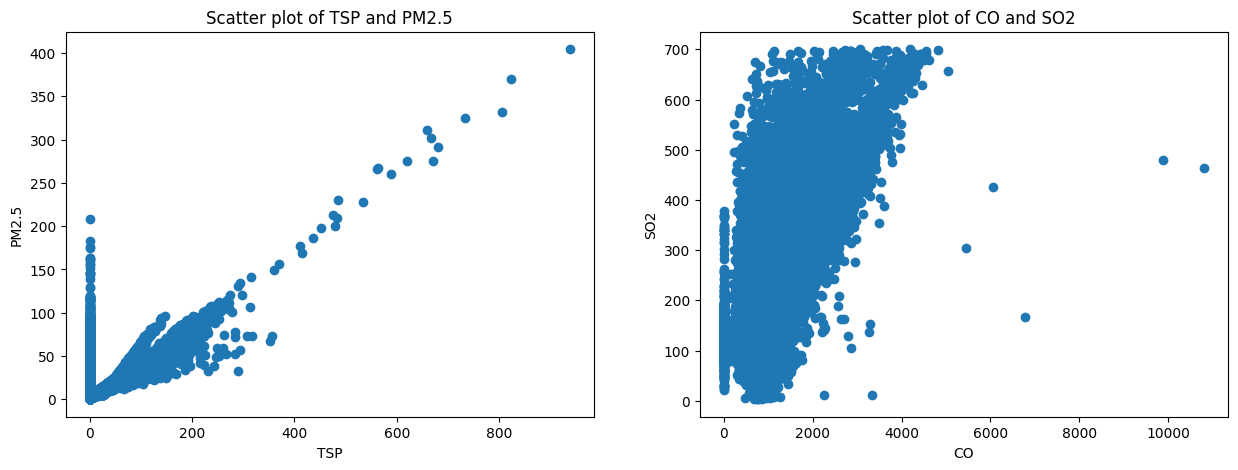

In [79]:
plt.figure(figsize=(15,5))
plt.tight_layout()

plt.subplot(1,2,1)
plot_scatter(plt, df, 'TSP', 'PM2.5')

plt.subplot(1,2,2)
plot_scatter(plt, df, 'CO', 'SO2')

plt.show()

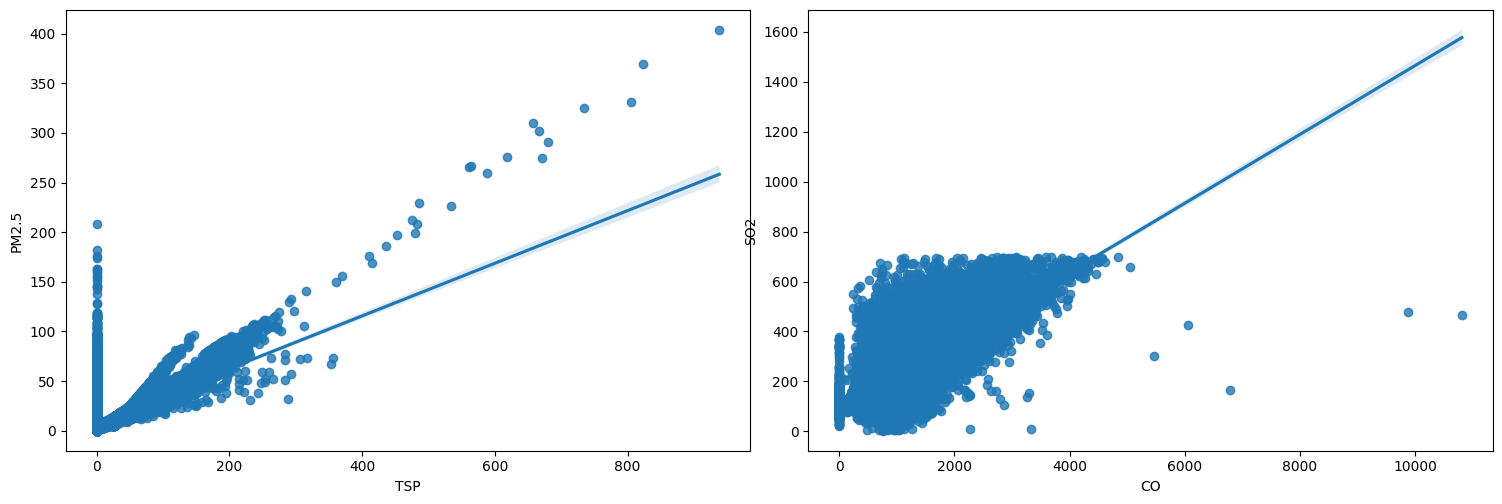

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
fig.tight_layout()

sb.regplot(data=df, x='TSP', y='PM2.5', y_jitter=.03, ax=axes[0])
sb.regplot(data=df, x='CO', y='SO2', y_jitter=.03, ax=axes[1])

plt.show()

# Phân tích hồi quy, giải thích

In [81]:
results = smf.ols('Q("Temperature") ~ Q("TSP") + Q("PM2.5") + Q("O3") + Q("CO") + Q("NO2") + Q("SO2")', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("Temperature")   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     2909.
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        23:16:18   Log-Likelihood:                -88701.
No. Observations:               32509   AIC:                         1.774e+05
Df Residuals:                   32502   BIC:                         1.775e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.9534      0.074    324.652      0.0

In [82]:
results = smf.ols('Q("TSP") ~ Q("PM2.5")', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Q("TSP")   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 4.091e+04
Date:                Fri, 19 May 2023   Prob (F-statistic):               0.00
Time:                        23:16:18   Log-Likelihood:            -2.4673e+05
No. Observations:               52488   AIC:                         4.935e+05
Df Residuals:                   52486   BIC:                         4.935e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6262      0.208     41.447      0.0